<a href="https://colab.research.google.com/github/andrears2112/IA/blob/main/Clasificador_Binario_de_COVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Clasificador binario de COVID**

Integrantes de equipo:

Rios Sicairos Andrea

Villegas Solis Jose Manuel

In [4]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import preprocess_input, ResNet50
from keras.models import Model
from keras.layers import Dense, MaxPool2D, Conv2D
import keras
import pandas as pd
import numpy as np
import os
import shutil
import glob
import matplotlib.pyplot as plt
import warnings

In [10]:
warnings.filterwarnings("ignore")
!unzip "/content/COVID-19_Radiography_Dataset.zip"

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7925.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7926.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7927.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7928.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7929.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-793.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7930.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7931.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7932.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7933.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7934.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7935.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Nor

In [11]:
covid_imgs = pd.read_excel("/content/COVID-19_Radiography_Dataset/COVID.metadata.xlsx")
opacity_images = pd.read_excel("./COVID-19_Radiography_Dataset/Lung_Opacity.metadata.xlsx")
normal_images = pd.read_excel("./COVID-19_Radiography_Dataset/Normal.metadata.xlsx")
pneumonia_images = pd.read_excel("./COVID-19_Radiography_Dataset/Viral Pneumonia.metadata.xlsx")

In [12]:
ROOT_DIR = "/content/COVID-19_Radiography_Dataset/"
imgs = ['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']

NEW_DIR = "/content/all_images/"

In [13]:
counter = {'COVID': 0, 'Lung_Opacity': 0, 'Normal': 0, 'Viral Pneumonia': 0}

if not os.path.exists(NEW_DIR):
    os.mkdir(NEW_DIR)

    for i in imgs:
        org_dir = os.path.join(ROOT_DIR, i + "/images/")

        for imgfile in glob.iglob(os.path.join(org_dir, "*.png")):
            file_name = os.path.splitext(os.path.basename(imgfile))[0]
            new_file_name = f"{file_name}_{i}.png"
            shutil.copy(imgfile, os.path.join(NEW_DIR, new_file_name))
            counter[i] += 1
else:
    print("Already Exist")

print("Cantidad de imágenes por categoría:")
print(counter)

Cantidad de imágenes por categoría:
{'COVID': 3616, 'Lung_Opacity': 6012, 'Normal': 10192, 'Viral Pneumonia': 1345}


In [14]:
if not os.path.exists(NEW_DIR+"train_test_split/"):

  os.makedirs(NEW_DIR+"train_test_split/")

  os.makedirs(NEW_DIR+"train_test_split/train/Normal")
  os.makedirs(NEW_DIR+"train_test_split/train/Covid")

  os.makedirs(NEW_DIR+"train_test_split/test/Normal")
  os.makedirs(NEW_DIR+"train_test_split/test/Covid")

  os.makedirs(NEW_DIR+"train_test_split/validation/Normal")
  os.makedirs(NEW_DIR+"train_test_split/validation/Covid")


  for i in np.random.choice(replace= False , size= 3000 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 3900 , a = glob.glob(NEW_DIR+imgs[2]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Normal" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 900 , a = glob.glob(NEW_DIR+imgs[3]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 308 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 500 , a = glob.glob(NEW_DIR+imgs[2]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Normal" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 200 , a = glob.glob(NEW_DIR+imgs[3]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 300 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 300 , a = glob.glob(NEW_DIR+imgs[2]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Normal" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 200 , a = glob.glob(NEW_DIR+imgs[3]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Covid" )
    os.remove(i)

In [15]:
train_path  = "/content/all_images/train_test_split/train"
valid_path  = "/content/all_images/train_test_split/validation"
test_path   = "/content/all_images/train_test_split/test"

In [16]:
train_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input,
                                    zoom_range= 0.2,
                                    horizontal_flip= True,
                                    shear_range= 0.2,

                                    )

train = train_data_gen.flow_from_directory(directory= train_path,
                                           target_size=(224,224))

Found 7800 images belonging to 2 classes.


In [17]:
validation_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input  )

valid = validation_data_gen.flow_from_directory(directory= valid_path,
                                                target_size=(224,224))

Found 1008 images belonging to 2 classes.


In [18]:
test_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input )

test = train_data_gen.flow_from_directory(directory= test_path ,
                                          target_size=(224,224),
                                          shuffle= False)

Found 800 images belonging to 2 classes.


In [19]:
# Rayos X con COVID esta representado por 0 y Normal por 1
class_type = {0:'Covid',  1 : 'Normal'}

In [20]:
from keras.applications.resnet50 import ResNet50
from keras.layers import Flatten , Dense, Dropout , MaxPool2D

In [21]:
res = ResNet50( input_shape=(224,224,3), include_top= False)

In [22]:
for layer in res.layers:
  layer.trainable = False

In [23]:
x = Flatten()(res.output)
x = Dense(units=2 , activation='sigmoid', name = 'predictions' )(x)

# Creacion del modelo
model = Model(res.input, x)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [24]:
model.compile( optimizer= 'adam' , loss = 'categorical_crossentropy', metrics=['accuracy'])

In [25]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor= "val_accuracy" , min_delta= 0.01, patience= 3, verbose=1)
mc = ModelCheckpoint(filepath="bestmodel.h5", monitor="val_accuracy", verbose=1, save_best_only= True)

In [27]:
hist = model.fit_generator(train, steps_per_epoch= 10, epochs= 30, validation_data= valid , validation_steps= 16, callbacks=[es,mc])

Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 3.1475 - accuracy: 0.8125
Epoch 1: val_accuracy improved from -inf to 0.86806, saving model to bestmodel.h5
10/10 [==============================] - 344s 37s/step - loss: 3.1475 - accuracy: 0.8125 - val_loss: 1.6697 - val_accuracy: 0.8681
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 2.9201 - accuracy: 0.8281
Epoch 2: val_accuracy improved from 0.86806 to 0.89286, saving model to bestmodel.h5
10/10 [==============================] - 271s 29s/step - loss: 2.9201 - accuracy: 0.8281 - val_loss: 1.3847 - val_accuracy: 0.8929
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 1.7301 - accuracy: 0.8469
Epoch 3: val_accuracy improved from 0.89286 to 0.89583, saving model to bestmodel.h5
10/10 [==============================] - 343s 37s/step - loss: 1.7301 - accuracy: 0.8469 - val_loss: 1.2434 - val_accuracy: 0.8958
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 1.367

In [28]:
from keras.models import load_model
model = load_model("bestmodel.h5")

In [29]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

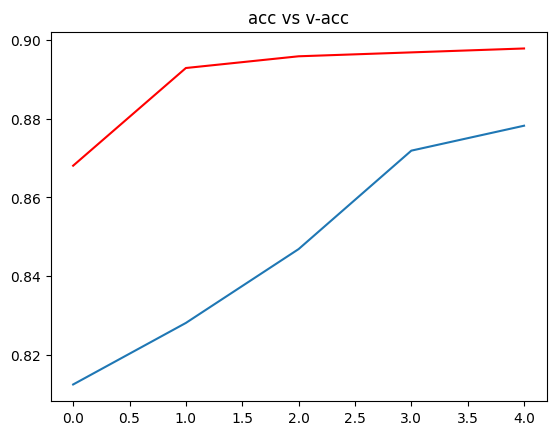

In [30]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

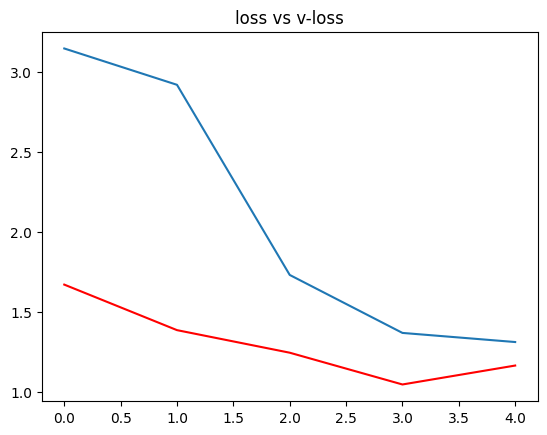

In [31]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [32]:
# Comprobando precision

acc = model.evaluate_generator(generator= test)[1]
print(f"La precision dle modelo es = {acc} %")

La precision dle modelo es = 0.8575000166893005 %


In [33]:
from keras.preprocessing import image

def get_img_array(img_path):
  path = img_path
  img = image.load_img(path, target_size=(224,224,3))
  img = image.img_to_array(img)
  img = np.expand_dims(img , axis= 0 )

  return img

1/1 [==============================] - 1s 1s/step
La imagen de rayos X proporcionada es del tipo: Normal

1/1 [==============================] - 0s 356ms/step
Las posibilidades de que la imagen sea Covid son: 36.20055615901947 percent

1/1 [==============================] - 0s 374ms/step
The chances of image being Normal is: 91.12187027931213 percent


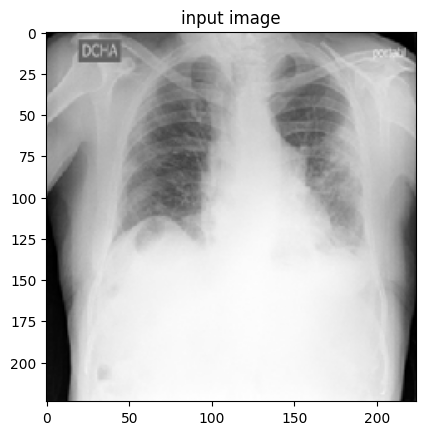

In [35]:
# En base a una ruta da un aprediccion.

path = "/content/all_images/COVID-3290_COVID.png"
img = get_img_array(path)

res = class_type[np.argmax(model.predict(img))]
print(f"La imagen de rayos X proporcionada es del tipo: {res}")
print()
print(f"Las posibilidades de que la imagen sea Covid son: {model.predict(img)[0][0]*100} percent")
print()
print(f"The chances of image being Normal is: {model.predict(img)[0][1]*100} percent")


# to display the image
plt.imshow(img[0]/255, cmap = "gray")
plt.title("input image")
plt.show()